In [964]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [965]:
im = cv2.imread('./images/mountain.jpg', cv2.IMREAD_COLOR)
im_gray = cv2.imread('./images/mountain.jpg', cv2.IMREAD_GRAYSCALE)

In [966]:
def get_gauss_pyramid(im, l=4, sub=2, smoothing=1.0):
    res = [im]
    
    for i in range(l):
        tmp = cv2.GaussianBlur(im, (0,0), smoothing)
        tmp = cv2.resize(im, (0,0), fx=1/sub, fy=1/sub)
        res.append(tmp)
        im = tmp
    
    return res

In [967]:
def window_func(x, y, s):
    return np.exp(-(x**2 + y**2)/(2*s**2))

In [968]:
def get_harris_matrix(im, si=1.5, sd=1, k=0.04):
    h, w = im.shape[0], im.shape[1]
    prod = []
    
    Iy, Ix = np.gradient(im)
    
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy
    
    Sx2 = cv2.GaussianBlur(Ix2, (3, 3), si)
    Sy2 = cv2.GaussianBlur(Iy2, (3, 3), si)
    Sxy = cv2.GaussianBlur(Ixy, (3, 3), si)
    
    detM = (Sx2 * Sy2) - (np.square(Sxy))
    trM = Sx2 + Sy2

    R = detM - k * (np.square(trM))
        
    return R, Sx2, Sy2, Sxy

In [969]:
def get_max_R(R, thresold=0.1):
    localMax = np.ones(R.shape, dtype=np.uint8)
    localMax[R <= np.max(R) * 0.1] = 0
    
    maxima = []
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if localMax[i, j] == 1:
                maxima.append((j, i))
    
    return maxima

In [970]:
def get_feature_points(im, output_im):
    R, Sx2, Sy2, Sxy = get_harris_matrix(cur_img)
    maxima = get_max_R(R)
    
    for p in maxima:
        output_im = cv2.circle(output_im, p, 1, (0, 0, 255), 1)
    
    return maxima, output_im

In [971]:
im_pyramid = get_gauss_pyramid(im_gray)

In [972]:
cur_img = im_pyramid[1]

In [973]:
test_img = cur_img.copy()

In [974]:
fp, fp_img = get_feature_points(cur_img, test_img)

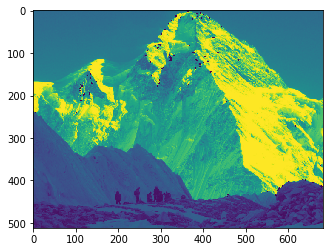

In [975]:
plt.imshow(fp_img)

In [976]:
cv2.imwrite("test.png", test_img)

True

In [977]:
def get_orientations(M, so=4.5):
    Iy, Ix = np.gradient(M)
    Sy, Sx = cv2.GaussianBlur(Iy, (3, 3), so), cv2.GaussianBlur(Ix, (3, 3), so)
    
    res = []
    
    for i in range(Sy.shape[0]):
        tmp = []
        for j in range(Sy.shape[1]):
            v = np.array([Sx[i, j], Sy[i, j]])
            v_norm = np.linalg.norm(v)
            if v_norm == 0:
                tmp.append(0.0)
            else:
                tmp.append(v / v_norm)
        res.append(tmp)
    
    return np.array(res)

In [978]:
z = get_orientations(cur_img)

c:\users\nikita\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [979]:
z.shape

(512, 682)

True

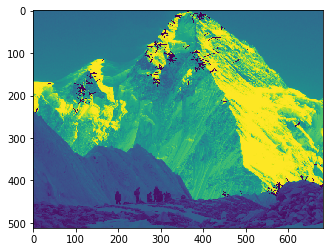

In [980]:
for p in maxima:
        x2 = int(p[0] + 15 * z[p[1], p[0]][0])
        y2 = int(p[1] + 10 * z[p[1], p[0]][1])
#         output_im = cv2.circle(fp_img, (x2, y2), 2, (0, 0, 255), 2)
        try:
            cv2.line(fp_img, p, (x2, y2), (0, 255, 0), thickness=1, lineType=1)
        except:
            continue
plt.imshow(fp_img)
cv2.imwrite("test.png", fp_img)